# Project 3: Bank Customer Churn Prediction 🏦📉

### 1. Project Objective
The objective of this project is to identify bank customers who are likely to leave (churn). By predicting churn, the bank can take proactive measures to retain high-risk customers.

**Problem Type:** Binary Classification (Churn vs. No Churn)  
**Target Variable:** `Exited` (1 = Churned, 0 = Retained)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the churn dataset
df = pd.read_csv('Churn_Modelling.csv')

# Drop irrelevant columns that don't help in prediction
# RowNumber, CustomerId, and Surname are unique to each customer and provide no pattern
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

print("Dataset Loaded and Irrelevant Columns Dropped")
print(df.head())
print(df.info)

Dataset Loaded and Irrelevant Columns Dropped
   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
<bound method DataFrame.info of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.

## 2. Exploratory Data Analysis (EDA)
Understanding the distribution of churn across different demographics like Geography and Gender.

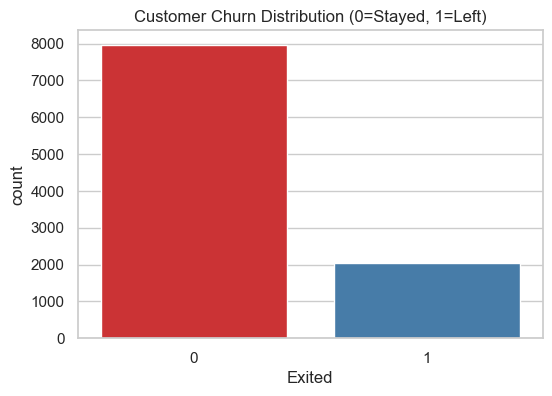

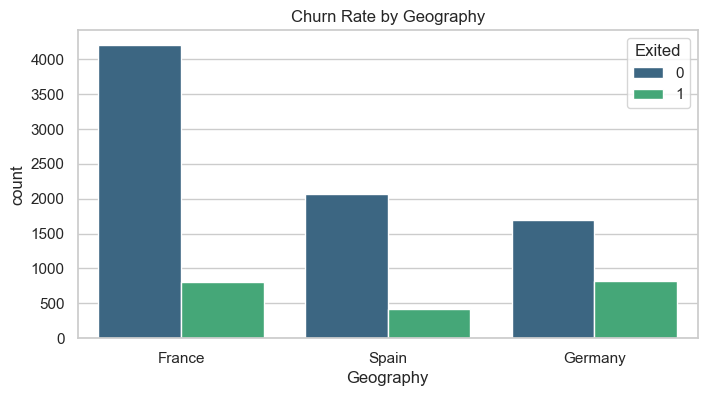

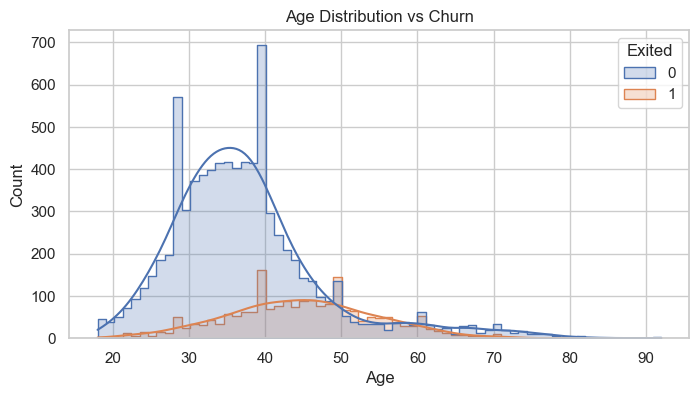

In [7]:
sns.set_theme(style="whitegrid")

# 1. Churn Distribution (How many left vs stayed)
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette='Set1', hue='Exited', legend=False)
plt.title('Customer Churn Distribution (0=Stayed, 1=Left)')
plt.show()

# 2. Churn by Geography
plt.figure(figsize=(8, 4))
sns.countplot(x='Geography', hue='Exited', data=df, palette='viridis')
plt.title('Churn Rate by Geography')
plt.show()

# 3. Age vs Churn (Age is often a big factor in churn)
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, element="step")
plt.title('Age Distribution vs Churn')
plt.show()

## 3. Data Preprocessing & Categorical Encoding
Machine Learning models require numerical input. We need to:
1. **Encode Gender:** Convert Male/Female into 0 and 1.
2. **One-Hot Encode Geography:** Convert France, Spain, Germany into numerical columns.
3. **Feature Scaling:** Since columns like Balance and EstimatedSalary have large values, we scale them to a standard range.

In [8]:
# Label Encoding for Gender (Binary)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-Hot Encoding for Geography (More than 2 categories)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Define Features (X) and Target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Crucial for classification)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Encoding and Scaling complete.")

Encoding and Scaling complete.


## 4. Model Training: Random Forest Classifier
We use the **Random Forest Classifier** because it is powerful for classification and allows us to see **Feature Importance**, helping the bank understand why customers leave.

Accuracy Score: 86.65%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



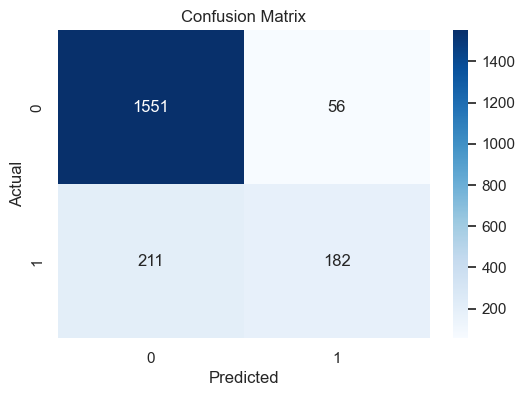

In [9]:
# Initialize and Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 5. Analyzing Feature Importance
This step identifies which factors (like Age, Balance, or Number of Products) influence a customer's decision to leave the bank.

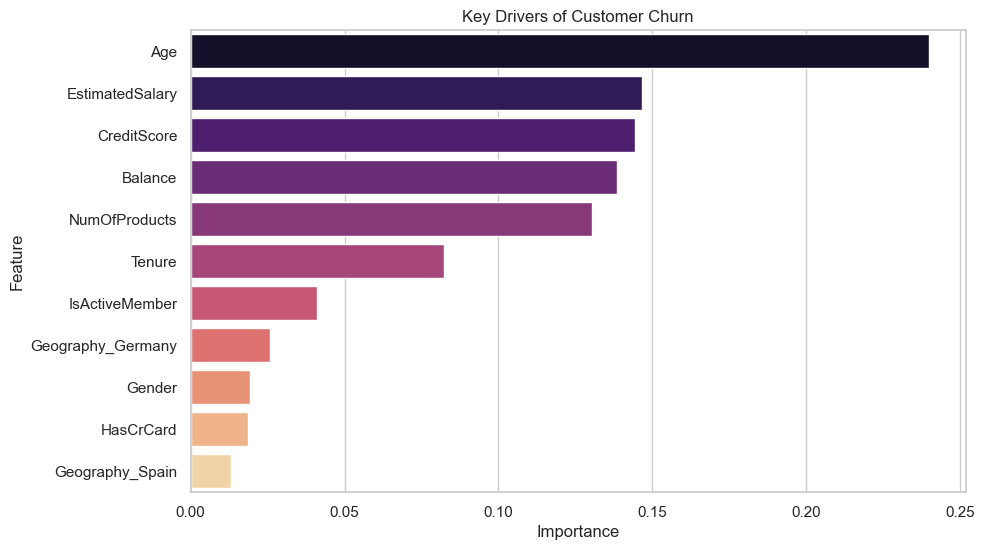

In [10]:
# Extract Feature Importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma', hue='Feature', legend=False)
plt.title('Key Drivers of Customer Churn')
plt.show()

## 6. Conclusion & Insights
- **Top Factors:** According to the model, **Age, Estimated Salary, and Credit Score** are the primary drivers of churn.
- **Geography:** Customers in certain regions (e.g., Germany) showed a higher tendency to leave compared to others.
- **Model Performance:** The Random Forest model successfully predicted churn with a solid accuracy, providing actionable insights for the bank's retention strategy.